# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: ***313296071_308147131 ***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [3]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [4]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1e91cdbf708>, <__main__.Node at 0x1e91cdbf7c8>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [5]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [6]:
#############################################################################
# TODO: Find the column\s with missing values and remove them from the data.#
#############################################################################
data = data.dropna(axis='columns')
print("There were {} columns with missing values.".format(22-data.shape[1]))
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

There were 0 columns with missing values.


We will split the dataset to `Training` and `Test` sets

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])

# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)


Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


## Impurity Measures

(5 points each - 10 points total)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation.

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    gini +=1

    unique_element, element_count = np.unique(data[:, -1], return_counts=True)
    

    for element in element_count:
        gini -= (element / data.shape[0])**2
        
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################

    
    unique_elemnet, element_count = np.unique(data[:, -1], return_counts=True)
    proportion = element_count/data.shape[0]
    entropy -= np.dot(proportion, np.log2(proportion))    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [10]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.49956363223797745, 0.9993703627906085)

## Goodness of Split

(10 Points)

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch).

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    # get the values of attributes & and their amount
    unique_element, element_count = np.unique(data[:,feature],  return_counts=True)
    
    proportion = element_count / data.shape[0] ## proportion of each value


    sigma = [] 
    
    #for every value of attribute save its impurity
    for value in unique_element:
        childData = data[np.where(data[:,feature] == value)]
        sigma.append(impurity_func(childData))
    
    # sigma = the sum of proportion*impurity of every value of attribute
    sigma = np.dot(proportion,sigma)
    
    goodness = impurity_func(data) - sigma
    
    
    if(gain_ratio):
        splitInfo = - np.sum(proportion*np.log2(proportion))
        if splitInfo == 0:
            goodness = 0
            
        goodness = goodness/splitInfo
       
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness #, unique_element, element_indices, sorted_data

## Building a Decision Tree

(30 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class.

In [12]:
class DecisionNode:

    # This class will hold everything you require to construct a decision tree.
    # The structure of this class is up to you. However, you need to support basic 
    # functionality as described above. It is highly recommended that you 
    # first read and understand the entire exercise before diving into this class.
    
    def __init__(self, featureIndex, value ,data, depth, parentIndex): #impurity
        self.data = data                     # relevent data for this node
        self.featureIndex = featureIndex     # column index of criteria being tested
        self.value = value                   # the value of attribute 
        self.depth = depth                   # value of the attribute leading here aka 'hot' 'cold' 'mild'
        self.parentIndex = parentIndex
        self.children = []
        
        # counts how many are classified as edible or poisons
        def count_labels(data):
            unique_element, element_count = np.unique(data[:, -1], return_counts=True)
            e, p = 0, 0
            for i, count in enumerate(element_count):
                if(unique_element[i] == 'e'):
                    e = count
                elif unique_element[i] == 'p':
                    p = count

            return e, p
        
        self.edible , self.poisn = count_labels(data)
        
        # set prediction based on the majority     
        self.predict = 'e' if self.edible > self.poisn else 'p'
    
    def set_feature(self,feature):
        self.featureIndex = feature
    
    def add_child(self, childNode):
        childNode.parent = self
        self.children.append(childNode)
        
    def is_leaf(self):
        return self.children == []    
    
    def chi_sqr_calc(self, feature):
        probEdible = self.edible/(self.edible+self.poisn)
        probPoisn = 1 - probEdible

        #values= attribute array of this feature
        # Df = a vector of amount of instance from each value
        values, Df = np.unique(self.data[:, feature], return_counts=True) 

        Eedible = Df*probEdible #E0
        Epoisn = Df*probPoisn #E1
        
        # pf = vector of instances for which xj = value & class= edible
        # nf = vector of instances for which xj = value & class= poisn
        pf = []
        nf = []

        for child in values:
            childData = self.data[np.where(self.data[:, feature] == child)]
            element, element_count = np.unique(childData[:,-1], return_counts=True)
            e, p =0 ,0
            for i, count in enumerate(element_count):
                if(element[i] == 'e'):
                    e = count
                elif element[i] == 'p':
                    p = count
            pf.append(e)
            nf.append(p)

        Xsqr = np.sum(((pf-Eedible)**2)/Eedible + ((nf-Epoisn)**2)/Epoisn)

        return Xsqr, (len(Df)-1)
        
    
   
    

In [13]:
## helper function to find the best split based on all features goodnes
def find_best_split(data, impurityFunc, gain_ratio):
    max_goodness = 0.0
    best_feature = -1
    
    for feature in range(data.shape[1] -1):  
        currentGoodness = goodness_of_split(data, feature, impurityFunc, gain_ratio)
        if currentGoodness > max_goodness:
            max_goodness = currentGoodness
            best_feature = feature
    return best_feature

In [27]:
def build_tree(data, impurityFunction, gain_ratio=False, chi=1, max_depth=1000, return_depth=False):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag

    Output: the root node of the tree.
    """
    root = None
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    depth = 0
    
    root = DecisionNode(None,None, data, depth, None)
    
    queue = [root]

    for currentNode in queue:

        if currentNode.depth >= max_depth:
            break
            
        if impurityFunction(currentNode.data) == 0: #it's a leaf- monochromatic 
            continue
        
        feature = find_best_split(currentNode.data, impurityFunction, gain_ratio)

        if(feature == -1):  #no splitting value was found- split will make it better
            continue
        
        currentNode.set_feature(feature)

        unique_elements = np.unique(currentNode.data[:, feature])
    
        if chi != 1:
            Xsqr, df = currentNode.chi_sqr_calc(feature)
            df = len(unique_elements) -1 
            if Xsqr < chi_table[df][chi]:
                continue
                
        
        # loop over currnet node children attributes
        for attribute in unique_elements:
            childData = currentNode.data[np.where(currentNode.data[:,feature] == attribute)] # get relevant data for child
            child = DecisionNode(None, attribute, childData, currentNode.depth + 1, feature) # creats node for the child
            currentNode.add_child(child)     # add child to parents children's list
            queue.append(child)             # add child node to queue
        
        if depth < currentNode.depth: 
            depth = currentNode.depth

    # if return_depth flag in on
    if(return_depth):
        return root, depth

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root


In [28]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurityFunction = calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurityFunction = calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurityFunction = calc_entropy, gain_ratio=True) # entropy and gain ratio


## Tree evaluation

(10 points) 

Complete the functions `predict` and `calc_accuracy`. 

In [29]:
def predict(root, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: a row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    
    while(pred is None):
        childrenFound = False

        # a leaf was reached
        if (root.children == []) : 
            pred = root.predict 
          
        else:
            
            for child in root.children:
                # we found a child to continue our path down, check its children
                if child.value == instance[root.featureIndex] : 
                    root = child
                    childrenFound = True
                    break
            
            # we found no child, we cannot go any farther
            if (childrenFound == False):
                break
                
    pred = root.predict
       
       
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pred

In [30]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for instance in dataset:  
        if instance[-1] == predict(node, instance):     
            accuracy += 1
            

    accuracy = accuracy / dataset.shape[0]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [31]:
# #### Your code here ####
Accuracy_gini_testing = calc_accuracy(tree_gini, X_test)
Accuracy_gini_training= calc_accuracy(tree_gini, X_train)

Accuracy_entropy_testing =  calc_accuracy(tree_entropy, X_test)
Accuracy_entropy_training =  calc_accuracy(tree_entropy, X_train)

Accuracy_entropy_gain_testing =  calc_accuracy(tree_entropy_gain_ratio, X_test)
Accuracy_entropy_gain_training =  calc_accuracy(tree_entropy_gain_ratio, X_train)

if Accuracy_gini_testing > Accuracy_entropy_testing:
    best_funct = "Gini" if Accuracy_gini_testing > Accuracy_entropy_gain_testing else "Entropy with gainRatio"
    
else:
    best_funct = "Entropy" if Accuracy_entropy_testing > Accuracy_entropy_gain_testing else "Entropy with gainRatio"

print("Gini accuracy-\n Training set: {}\n Test set: {}\n".format(Accuracy_gini_training, Accuracy_gini_testing))
print("Entropy accuracy-\n Training set: {}\n Test set: {}\n".format(Accuracy_entropy_training, Accuracy_entropy_testing))
print("Entropy with gainRatio accuracy-\n Training set: {}\n Test set: {}\n".format(Accuracy_entropy_gain_training, Accuracy_entropy_gain_testing))
print("Function which created most accurate tree: {}.".format(best_funct))

Gini accuracy-
 Training set: 0.9924503528639422
 Test set: 0.7769571639586411

Entropy accuracy-
 Training set: 0.9940915805022157
 Test set: 0.7813884785819794

Entropy with gainRatio accuracy-
 Training set: 0.9963892991957984
 Test set: 0.7902511078286558

Function which created most accurate tree: Entropy with gainRatio.


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [32]:
#### Your code here ####
training = []
testing = []
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in depths:
    
    tree = build_tree(data=X_train, impurityFunction=calc_entropy, gain_ratio=True, max_depth=depth)
    training.append(calc_accuracy(tree, X_train)*100)
    testing.append(calc_accuracy(tree, X_test)*100)


#get the index of the most accurate tree
most_accurate_index =np.argmax(testing)


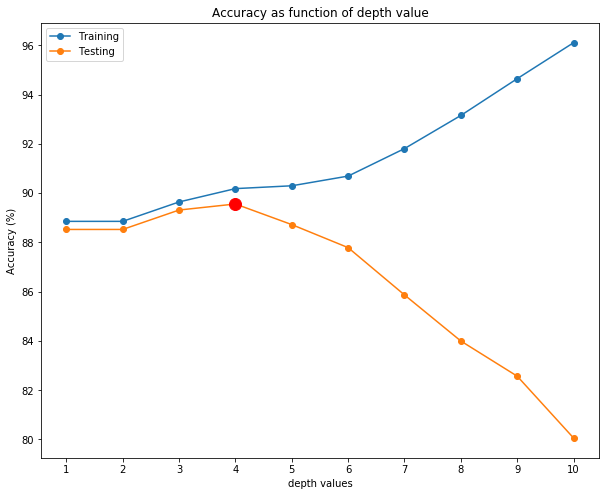

In [33]:
plt.plot(depths, training, "o-", label= 'Training')
plt.plot(depths, testing, "o-", label= 'Testing')
plt.xticks(depths)
plt.plot(depths[most_accurate_index], testing[most_accurate_index], 'ro',markersize=12)
plt.xlabel('depth values')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy as function of depth value')
plt.legend()
plt.show()

## Chi square pre-pruning

(15 points)

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. <br>
On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle.

In [34]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [35]:
#### Your code here ####
p_values = [1,0.5, 0.25, 0.1, 0.05, 0.0001]
chi_training_accuracy = []
chi_testing_accuracy = []
trees_depth = []
tupleList =[]


for value in p_values:
    tree, depth = build_tree(data=X_train, impurityFunction=calc_entropy, gain_ratio=True, chi=value, return_depth=True)
    chi_training_accuracy.append(calc_accuracy(tree, X_train)*100)
    chi_testing_accuracy.append(calc_accuracy(tree, X_test)*100)
    trees_depth.append(str(tuple([value, depth])))  


most_chi_accurate =np.argmax(chi_testing_accuracy[1:])+1

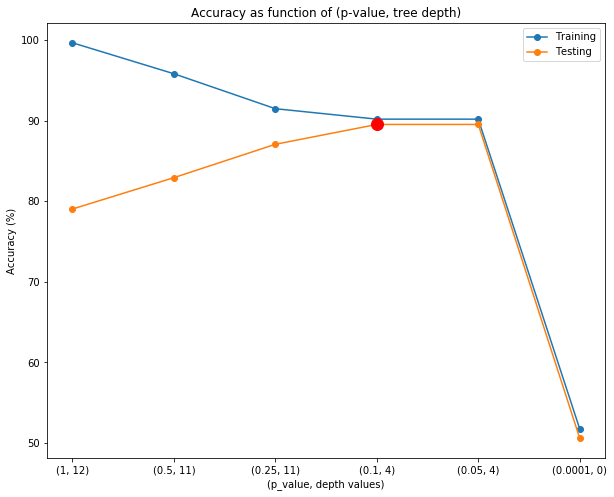

In [36]:

plt.xticks(np.arange(len(trees_depth)),trees_depth)
plt.plot(trees_depth, chi_training_accuracy, "o-", label= 'Training')
plt.plot(trees_depth, chi_testing_accuracy, "o-", label= 'Testing')
plt.plot(trees_depth[most_chi_accurate], chi_testing_accuracy[most_chi_accurate], 'ro',markersize=12)
plt.xlabel('(p_value, depth values)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy as function of (p-value, tree depth)')
plt.legend()
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [37]:
#### Your code here ####
tree_max_depth = build_tree(data=X_train, impurityFunction=calc_entropy, gain_ratio=True, max_depth=4)
tree_chi = build_tree(data=X_train, impurityFunction=calc_entropy, gain_ratio=True, chi=p_values[most_chi_accurate])

## Number of Nodes

(5 points) 

Of the two trees above we will choose the one with fewer nodes.

Complete the function counts_nodes and print the number of nodes in each tree

In [38]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    queue = []
    numOfNodes=0
    queue.append(node)
    
    for node in queue:
        numOfNodes += 1
        for child in node.children:
            queue.append(child)
    
    return numOfNodes
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [39]:
max_depth_tree_nodes = count_nodes(tree_max_depth) 
chi_tree_nodes = count_nodes(tree_chi)

fewestNodes = "tree_chi" if chi_tree_nodes < max_depth_tree_nodes else "tree_max_depth"
print("tree_chi no. of nodes: {} .\ntree_max_depth no. of nodes: {} .\n".format(chi_tree_nodes, max_depth_tree_nodes))
print("The tree with less nodes is- {}.".format(fewestNodes))

tree_chi no. of nodes: 55 .
tree_max_depth no. of nodes: 205 .

The tree with less nodes is- tree_chi.


## Print the tree

(5 points)

Complete the function `print_tree` and execute it on your chosen tree. Your code should do print:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
       [X5=a, leaf]: [{1.0: 5}]
       [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

In [40]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    if node.is_leaf():
        if node.edible == 0:
            labelsCount = "0.0: {}".format(node.poisn)
        elif node.poisn == 0:
            labelsCount = "1.0: {}".format(node.edible)
        else:
            labelsCount = "0.0: {}, 1.0: {}".format(node.poisn, node.edible)
        print("{}[X{}={}, leaf]: [{{{}}}]".format("  "*depth, node.parentIndex, node.value, labelsCount))
    
    else:
        if node.parentIndex is None:
            print("[ROOT, feature=X{}],".format(node.featureIndex))
        else:
            print("{}[X{}={}, feature =X{}],".format("  "*depth, node.parentIndex, node.value, node.featureIndex))
        for child in node.children:
            print_tree(child, depth +1)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

In [41]:
print_tree(tree_chi)

[ROOT, feature=X4],
  [X4=a, leaf]: [{0.0: 31, 1.0: 273}]
  [X4=c, leaf]: [{0.0: 137, 1.0: 10}]
  [X4=f, feature =X10],
    [X10=f, feature =X2],
      [X2=b, leaf]: [{0.0: 30, 1.0: 8}]
      [X2=g, leaf]: [{0.0: 26, 1.0: 5}]
      [X2=w, leaf]: [{0.0: 35, 1.0: 1}]
    [X10=k, leaf]: [{0.0: 1037, 1.0: 134}]
    [X10=s, leaf]: [{0.0: 310, 1.0: 22}]
  [X4=l, feature =X1],
    [X1=f, leaf]: [{0.0: 1, 1.0: 19}]
    [X1=s, leaf]: [{0.0: 16, 1.0: 94}]
    [X1=y, leaf]: [{0.0: 10, 1.0: 159}]
  [X4=m, leaf]: [{0.0: 25, 1.0: 2}]
  [X4=n, feature =X7],
    [X7=b, feature =X18],
      [X18=b, leaf]: [{0.0: 2, 1.0: 34}]
      [X18=k, leaf]: [{0.0: 93, 1.0: 843}]
      [X18=n, leaf]: [{0.0: 105, 1.0: 882}]
      [X18=o, feature =X19],
        [X19=c, leaf]: [{0.0: 4, 1.0: 12}]
        [X19=v, leaf]: [{1.0: 16}]
      [X18=r, leaf]: [{0.0: 46, 1.0: 6}]
      [X18=w, leaf]: [{0.0: 33, 1.0: 369}]
      [X18=y, leaf]: [{0.0: 3, 1.0: 35}]
    [X7=n, feature =X3],
      [X3=f, feature =X10],
        [X10